In [1]:
from spacerocks import SpaceRock
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 10
H0s = np.random.uniform(4, 12, N)
t0s = np.repeat(2459142.5, N)
phi0s = np.random.uniform(0, 2*np.pi, N)
rotation_periods = np.random.uniform(4/24, 16/24, N) # days
amplitudes = np.random.uniform(0.1, 0.5, N)

In [4]:
H = [lambda t, H0=H0, amplitude=amplitude, t0=t0, phi0=phi0, \
     rotation_period=rotation_period: H0 + amplitude * np.sin(2*np.pi*(t - t0)/rotation_period + phi0) \
     for (H0, t0, phi0, rotation_period, amplitude) in zip(H0s, t0s, phi0s, rotation_periods, amplitudes)]


In [5]:
rock = SpaceRock(a=np.random.uniform(40, 80, N), 
                 e=np.random.rand(N),
                 inc=np.random.uniform(0, 180, N), 
                 node=np.random.uniform(0, 360, N), 
                 varpi=np.random.uniform(0, 360, N), 
                 M=np.random.uniform(0, 360, N), 
                 epoch=t0s, 
                 H=H, 
                 origin='ssb')

In [6]:
epochs = np.linspace(2459142.5, 2459142.5+1, 200)
prop, planets, sim = rock.propagate(epochs=epochs, model=1)

In [7]:
obs = prop.observe(obscode='W84')

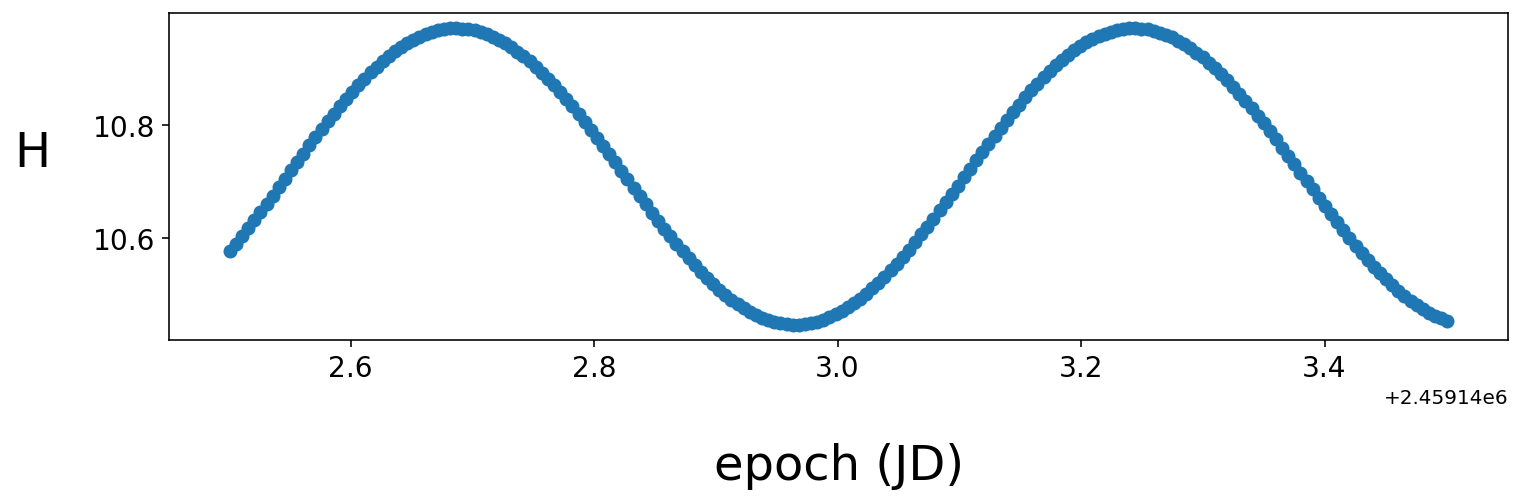

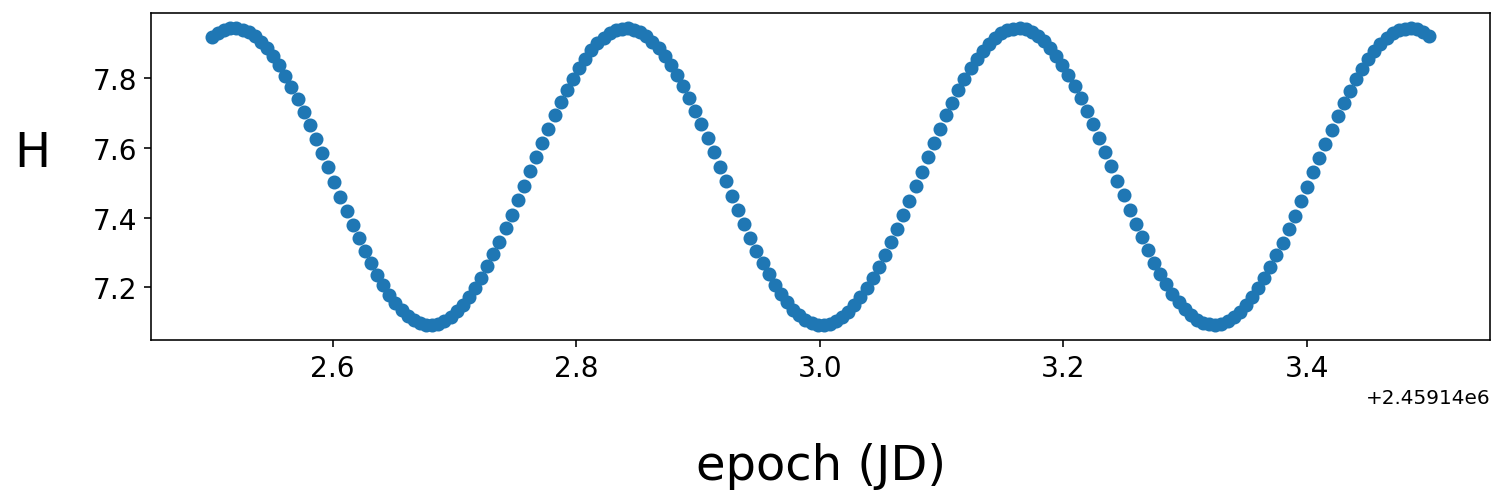

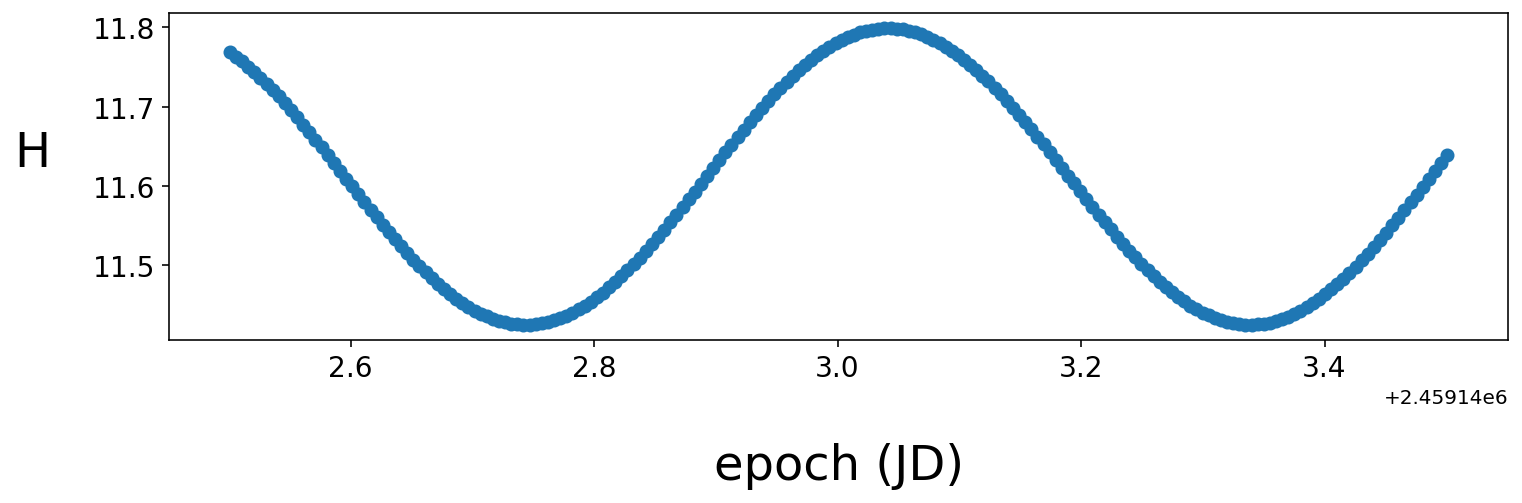

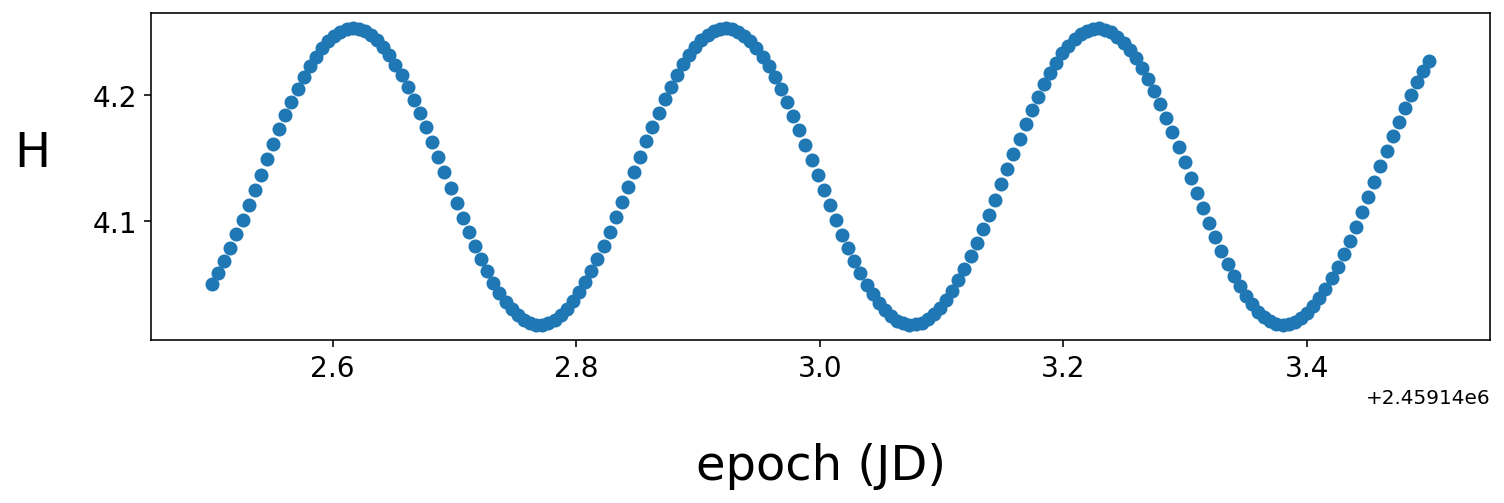

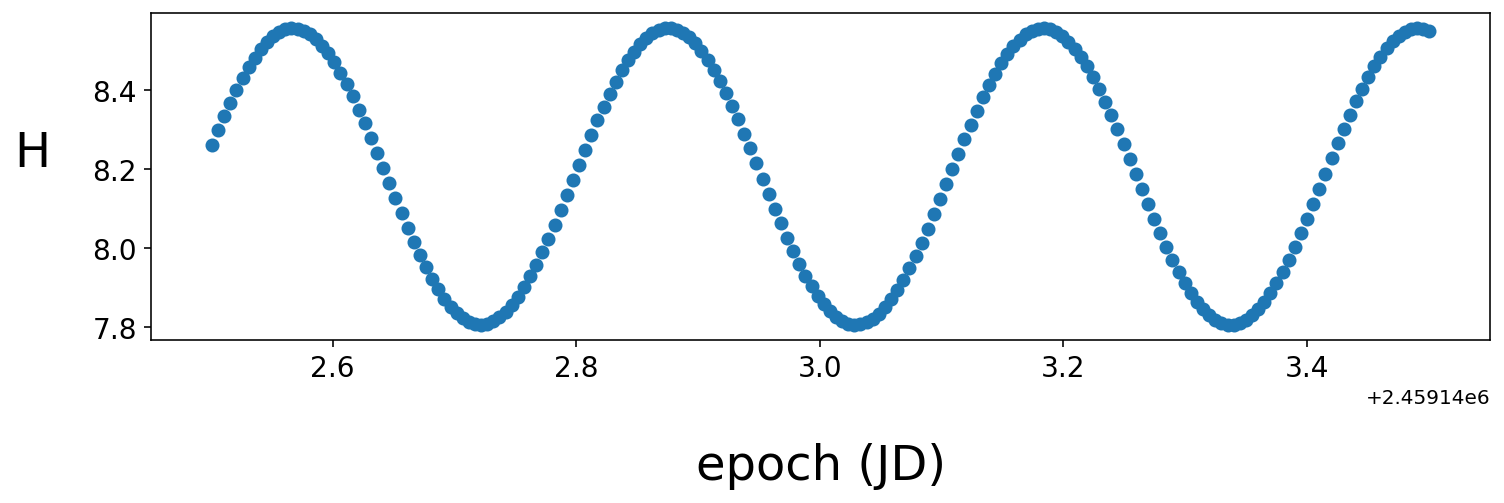

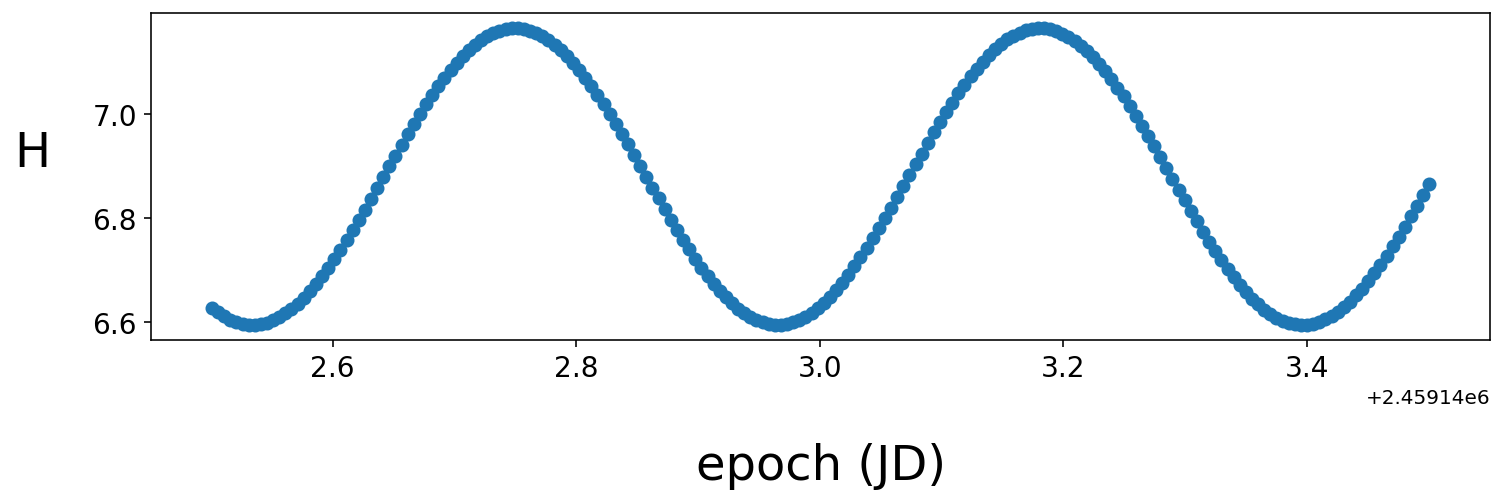

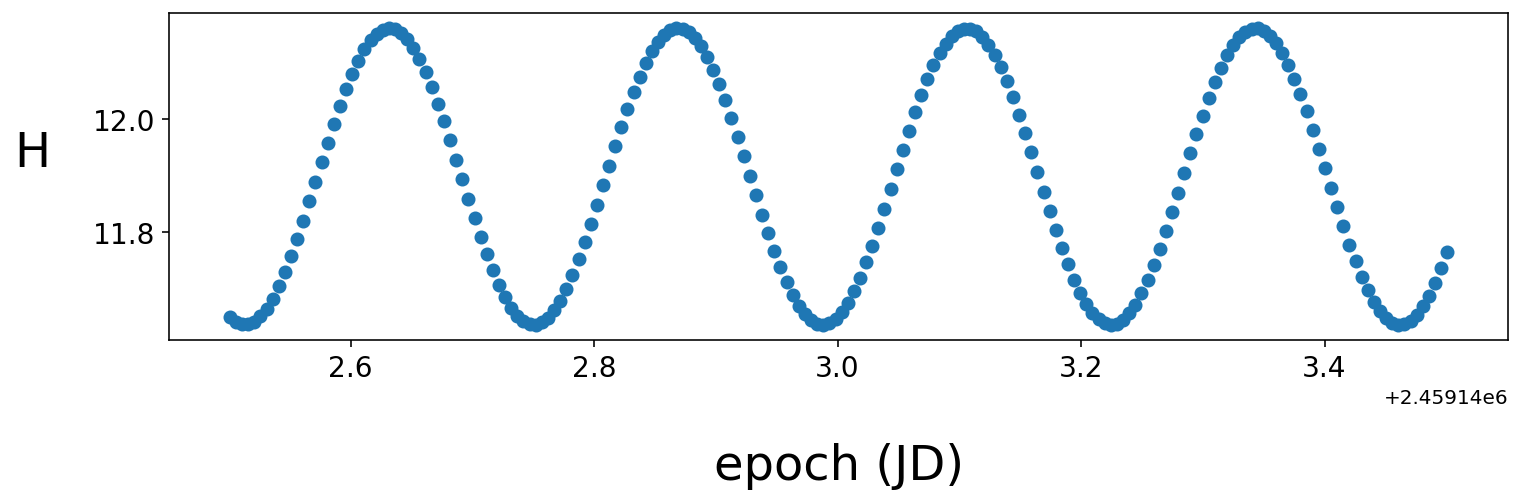

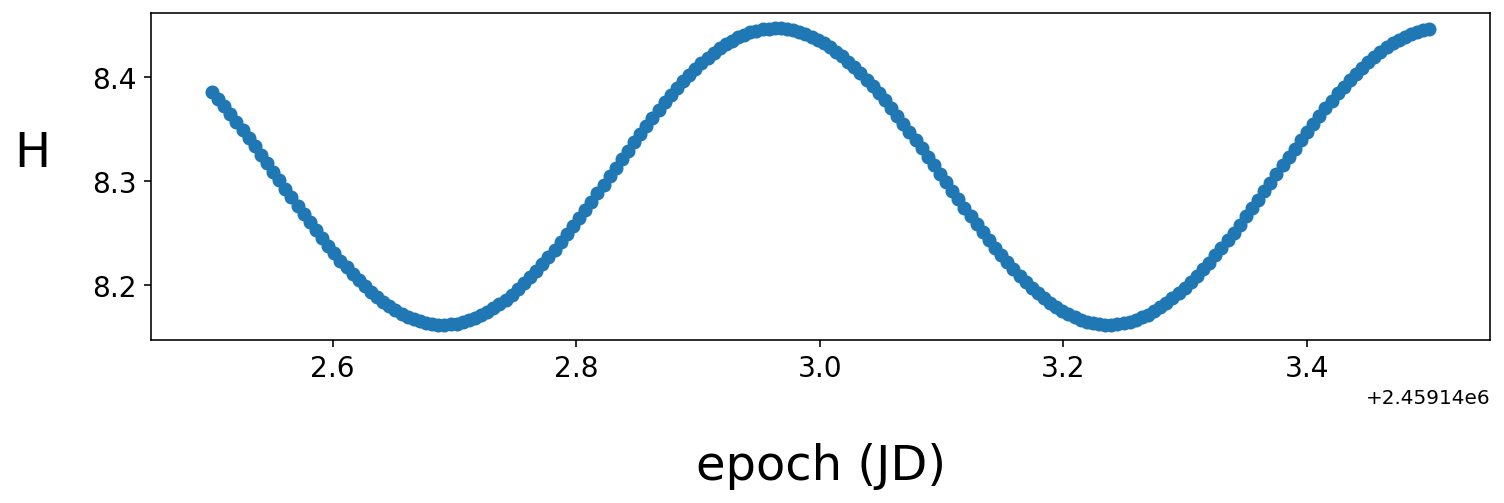

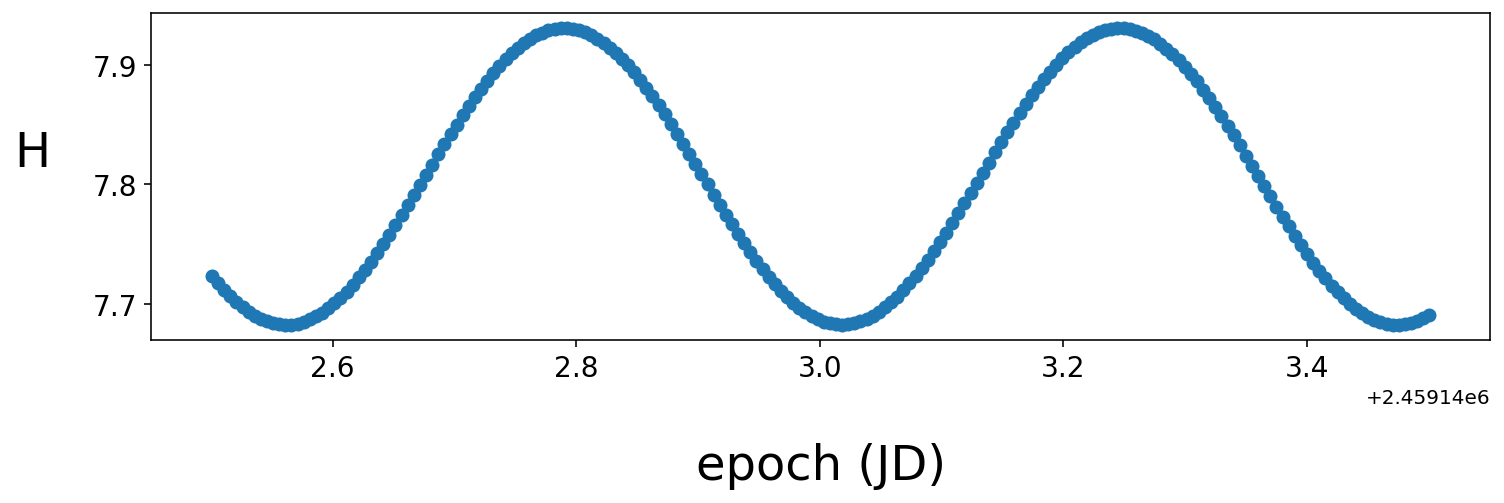

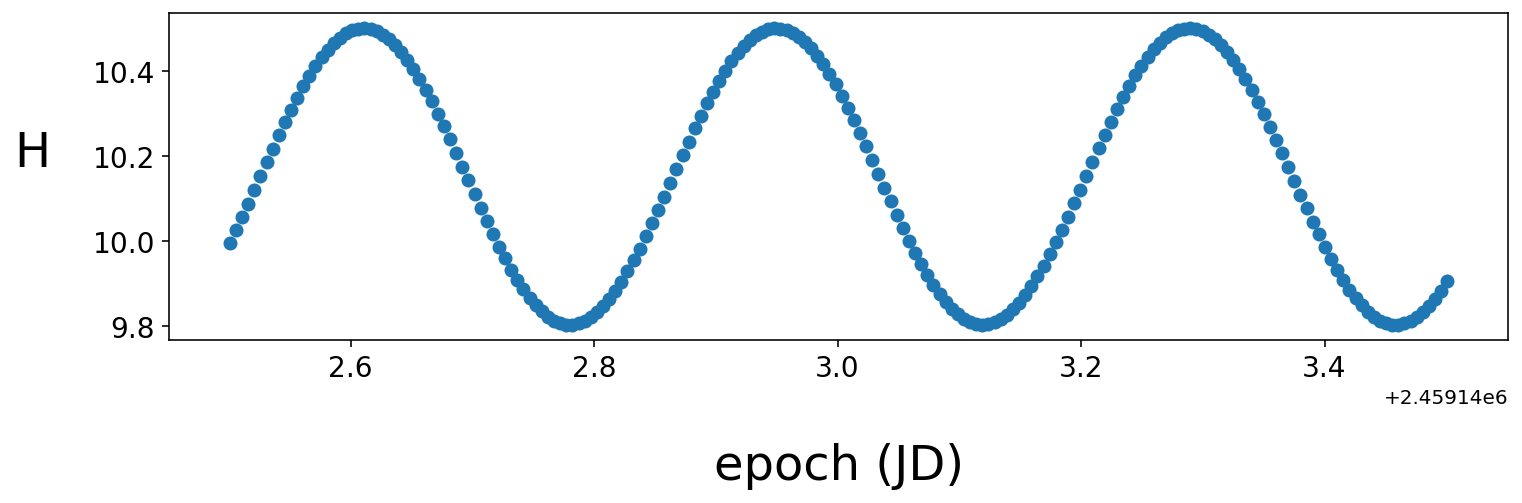

In [8]:
for name in np.unique(obs.name):
    x = obs[obs.name == name]
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.scatter(x.epoch.jd, x.H)
    ax.tick_params(labelsize=14)
    ax.set_xlabel('epoch (JD)', fontsize=24, labelpad=30)
    ax.set_ylabel('H', fontsize=24, labelpad=30, rotation=0)